<a href="https://colab.research.google.com/github/bhavbhavyaa/Prediction-using-Supervised-2/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns



In [ ]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


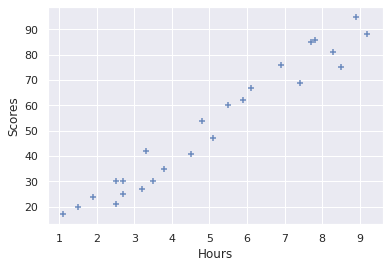

In [ ]:
sns.set(style="darkgrid")
sns.regplot(x=data["Hours"],y=data["Scores"],marker='+',fit_reg=False)

In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.25, random_state=0)

In [ ]:
X_train.shape

(18, 1)

In [ ]:
X_test.shape

(7, 1)

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression(normalize=True)  
regressor.fit(X_train, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

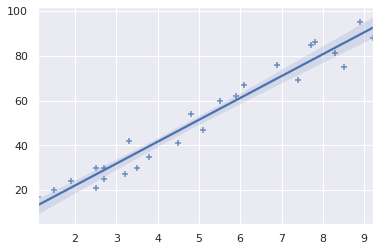

In [ ]:
sns.set(style="darkgrid")
sns.regplot(x=X,y=Y,marker='+')

In [ ]:
print(X_test)
Y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [ ]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [ ]:
Error = Y_test - Y_pred
print(Error)

[ 3.15527824 -6.74557494 -6.50062397  3.2135999   1.41189354 -4.71058194
  3.1786069 ]


In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.130879918502482


In [ ]:
hours = int(input("Enter the hours "))
pred_test = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_test[0]))

Enter the hours 23
No of Hours = 23
Predicted Score = 230.59080606137783
